In [1]:
# random forest

In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import re
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.tree as tree
import random

In [3]:
os.getcwd()
from thon.Choose import choose_features
from thon.churn import rollover, save_model, tree_importance, plot_eval, bake_pred
#data = choose_features("data/out/features.csv", cv_range = (0, 30), save = False)

In [4]:
data = pd.read_csv("data/out/features.csv")
random.seed(0)

In [5]:
# Training data
X, y = data.drop(columns = ['n']), data['n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, shuffle = False)

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state = 0))
])

In [7]:
search = GridSearchCV(pipeline,
                      {'model__n_estimators':np.arange(50, 301, 50)},                      
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 1)

In [8]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             param_grid={'model__n_estimators': array([ 50, 100, 150, 200, 250, 300])},
             scoring='neg_mean_squared_error', verbose=1)

In [9]:
search.best_params_.get("model__n_estimators")

150

In [10]:
# Training data

# Train the model
randomforestmodel = RandomForestRegressor(n_estimators = search.best_params_.get("model__n_estimators"), random_state = 0, max_features = "sqrt")
randomforestmodel.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
train_pred = pd.Series(randomforestmodel.predict(X_train), index=X_train.index)
test_pred = pd.Series(randomforestmodel.predict(X_test), index=X_test.index)

In [11]:
train_pred = train_pred.sort_index()
y_train = y_train.sort_index()
test_pred = test_pred.sort_index()
y_test = y_test.sort_index()

159.15884195223262


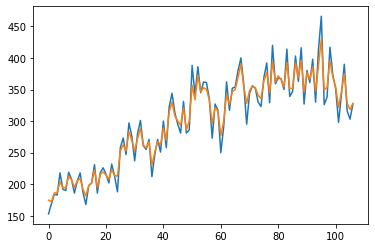

In [12]:
plot_eval(train_pred, y_train)

6209.375171014495


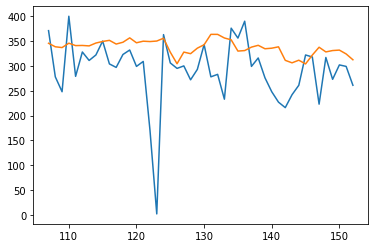

In [13]:
plot_eval(test_pred, y_test)

In [14]:
# feature names used in model
imp = tree_importance(randomforestmodel, X_train.columns, save = False)
imp.sort_values("importance", ascending = False)

,importance
localrent_lag3,0.117118
month,0.101895
totalsa_lag3,0.095792
ltrucksa_lag3,0.092784
unemployment_lag12,0.088074
altsales_lag3,0.087326
localunemp_lag12,0.063531
kwhcost_lag3,0.047749
new_units_lag6,0.044208
sentiment_lag3,0.039627


In [15]:
hasattr(randomforestmodel, "feature_importances_")

True

In [16]:
save_model(randomforestmodel, "randomforestmodel.pkl")

In [17]:
newdata = rollover(imp)
newdata

C:\Users\keato\Documents\LocalRStudio\LJ_Leading_Indicators\thon\churn.py:33: UserWarning: Features are named incorrectly, they are led 3 months ahead of their label
  warnings.warn("Features are named incorrectly, they are led 3 months ahead of their label")


,month,10yinf_lag9,altsales_lag3,durable_lag9,g_car_lag3,g_new_cars_lag3,g_tips_for_buying_a_car_lag9,g_used_cars_lag3,kwhcost_lag3,localrent_lag3,...,oil_lag9,sahmrule_lag9,sentiment_lag3,TM_lag12,TM_v_lag3,tmaturity_lag12,totalsa_lag3,unemployment_lag12,XOM_lag12,XOM_v_lag6
0,154,2.45,13.319,264356,96,65,18,54,0.118,432.474,...,85.622381,-0.20,51.5,176.57,3926911,1.19,13.811,4.6,64.47,505298620
1,155,2.46,13.185,262494,93,67,32,55,0.118,435.210,...,94.267000,-0.13,58.2,177.85,4927748,1.05,13.690,4.2,59.84,659735850
2,156,2.85,13.582,264258,82,63,17,49,0.118,439.701,...,112.440000,-0.10,58.6,185.30,5817079,0.78,14.057,3.9,61.19,660321520


,month,10yinf_lag9,altsales_lag3,durable_lag9,g_car_lag3,g_new_cars_lag3,g_tips_for_buying_a_car_lag9,g_used_cars_lag3,kwhcost_lag3,localrent_lag3,...,oil_lag9,sahmrule_lag9,sentiment_lag3,TM_lag12,TM_v_lag3,tmaturity_lag12,totalsa_lag3,unemployment_lag12,XOM_lag12,XOM_v_lag6
0,154,2.45,13.319,264356,96,65,18,54,0.118,432.474,...,85.622381,-0.20,51.5,176.57,3926911,1.19,13.811,4.6,64.47,505298620
1,155,2.46,13.185,262494,93,67,32,55,0.118,435.210,...,94.267000,-0.13,58.2,177.85,4927748,1.05,13.690,4.2,59.84,659735850
2,156,2.85,13.582,264258,82,63,17,49,0.118,439.701,...,112.440000,-0.10,58.6,185.30,5817079,0.78,14.057,3.9,61.19,660321520


In [19]:
np.where(np.isnan(newdata))

(array([], dtype=int64), array([], dtype=int64))

In [20]:
newdata.iloc[:,15]
newdata.columns[15]

'ngf_lag12'

In [21]:
# predict
pred = randomforestmodel.predict(newdata)
pred

array([316.3       , 309.68      , 329.42666667])

In [22]:
[349.28, 353.76, 343.72]

[349.28, 353.76, 343.72]

In [23]:
full = bake_pred(y_train, y_test, pred)

In [24]:
full.to_csv("data/out/random.csv")

In [25]:
full

,n,group
0,153.000000,train
1,169.000000,train
2,184.000000,train
3,183.000000,train
4,218.000000,train
...,...,...
151,299.000000,test
152,261.000000,test
153,316.300000,pred
154,309.680000,pred
